http://blog.csdn.net/longxinchen_ml/article/details/49798139
    
http://blog.csdn.net/longxinchen_ml

https://www.kancloud.cn/digest/machine-learning-dm/125820

In [1]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

SibSp : 堂兄弟/妹个数 

Parch : 父母与小孩个数 

In [3]:
data_train = pd.read_csv("./Titanic/train.csv")
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 乘客各属性分布

In [7]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  #用来正常显示负号

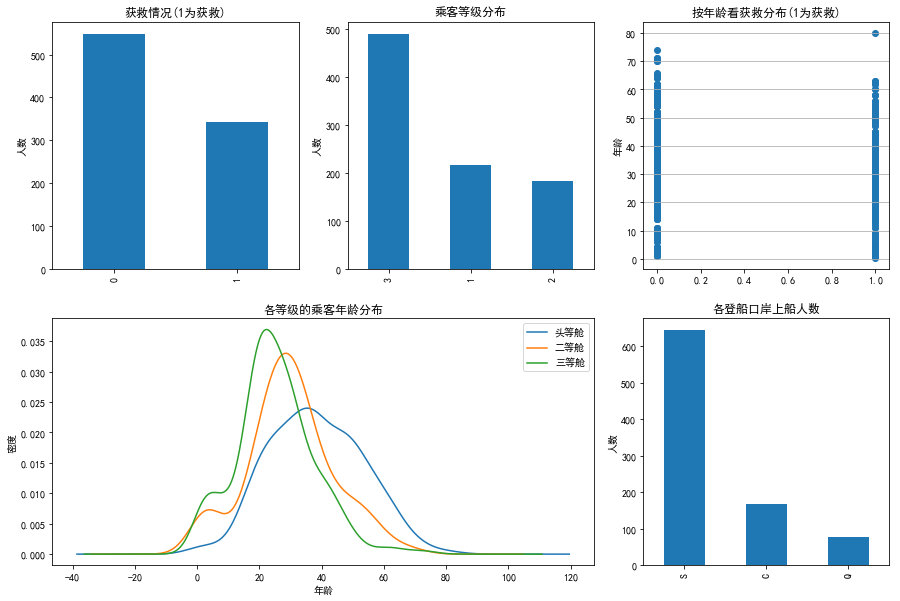

In [9]:
fig = plt.figure(figsize=(15,10))
fig.set(alpha=0.2) #设定图表颜色alpha参数

plt.subplot2grid((2,3),(0,0)) #一张大图里分列几张小图
data_train.Survived.value_counts().plot(kind='bar')
plt.title(u"获救情况(1为获救)")
plt.ylabel(u"人数")

plt.subplot2grid((2,3),(0,1))
data_train.Pclass.value_counts().plot(kind='bar')
plt.title(u"乘客等级分布")
plt.ylabel(u"人数")

plt.subplot2grid((2,3),(0,2))
plt.scatter(data_train.Survived,data_train.Age)
plt.ylabel(u"年龄")
plt.grid(b=True,which='major',axis='y')
plt.title(u"按年龄看获救分布(1为获救)")

plt.subplot2grid((2,3),(1,0),colspan=2)
data_train.Age[data_train.Pclass==1].plot(kind='kde')
data_train.Age[data_train.Pclass==2].plot(kind='kde')
data_train.Age[data_train.Pclass==3].plot(kind='kde')
plt.xlabel(u"年龄")
plt.ylabel(u"密度")
plt.title(u"各等级的乘客年龄分布")
plt.legend((u"头等舱",u"二等舱",u"三等舱"),loc='best')

plt.subplot2grid((2,3),(1,2))
data_train.Embarked.value_counts().plot(kind='bar')
plt.title(u"各登船口岸上船人数")
plt.ylabel(u"人数")
plt.show()


bingo，图还是比数字好看多了。所以我们在图上可以看出来，被救的人300多点，不到半数；3等舱乘客灰常多；遇难和获救的人年龄似乎跨度都很广；3个不同的舱年龄总体趋势似乎也一致，2/3等舱乘客20岁多点的人最多，1等舱40岁左右的最多(→_→似乎符合财富和年龄的分配哈，咳咳，别理我，我瞎扯的)；登船港口人数按照S、C、Q递减，而且S远多于另外俩港口。

这个时候我们可能会有一些想法了： 
* 不同舱位/乘客等级可能和财富/地位有关系，最后获救概率可能会不一样 
* 年龄对获救概率也一定是有影响的，毕竟前面说了，副船长还说『小孩和女士先走』呢 
* 和登船港口是不是有关系呢？也许登船港口不同，人的出身地位不同？

# 属性与获救结果的关联统计

## 看看各乘客等级的获救情况

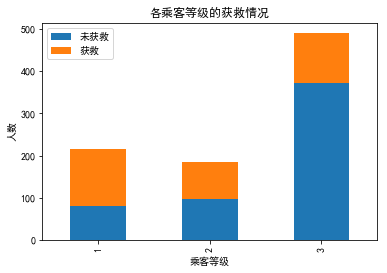

In [10]:
fig = plt.figure()
fig.set(alpha=0.2)
Survived_0 = data_train.Pclass[data_train.Survived==0].value_counts()
Survived_1 = data_train.Pclass[data_train.Survived==1].value_counts()
df = pd.DataFrame({u"获救":Survived_1,u"未获救":Survived_0})
df.plot(kind='bar',stacked=True)
plt.title(u"各乘客等级的获救情况")
plt.xlabel(u"乘客等级")
plt.ylabel(u"人数")
plt.show()

## 看看各性别的获救情况

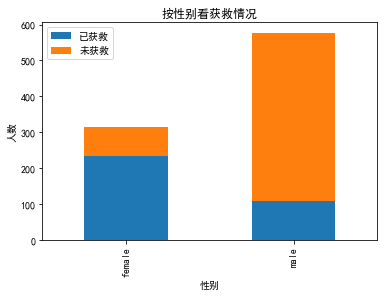

In [11]:
fig = plt.figure()
fig.set(alpha=0.2)
Survived_n = data_train.Sex[data_train.Survived == 0].value_counts()
Survived_y = data_train.Sex[data_train.Survived == 1].value_counts()
df = pd.DataFrame({'未获救':Survived_n,'已获救':Survived_y})
df.plot(kind='bar',stacked=True)
plt.title("按性别看获救情况")
plt.xlabel("性别")
plt.ylabel("人数")
plt.show()

## 各种舱级别情况下各性别的获救情况

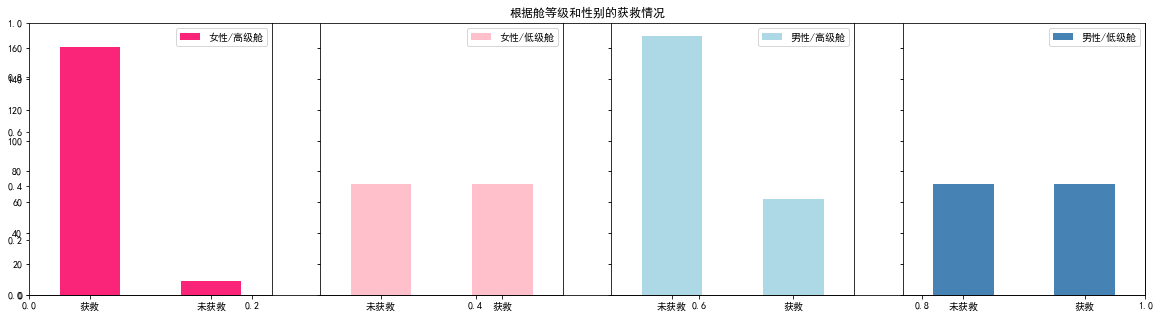

In [12]:
fig = plt.figure(figsize=(20,5))
fig.set(alpha=0.65)   #设置图像透明度
plt.title("根据舱等级和性别的获救情况")

ax1 = fig.add_subplot(141)
data_train.Survived[data_train.Sex=='female'][data_train.Pclass!=3].value_counts().plot(kind='bar',label="female,highclass",color='#FA2479')
ax1.set_xticklabels(["获救","未获救"],rotation=0)
ax1.legend(["女性/高级舱"],loc='best')

ax2 = fig.add_subplot(142,sharey=ax1)
data_train.Survived[data_train.Sex=='female'][data_train.Pclass == 3].value_counts().plot(kind='bar',label='female,lowclass',color='pink')
ax2.set_xticklabels(["未获救","获救"],rotation=0)
plt.legend(["女性/低级舱"],loc='best')

ax2 = fig.add_subplot(143,sharey=ax1)
data_train.Survived[data_train.Sex=='male'][data_train.Pclass != 3].value_counts().plot(kind='bar',label='female,lowclass',color='lightblue')
ax2.set_xticklabels(["未获救","获救"],rotation=0)
plt.legend(["男性/高级舱"],loc='best')

ax2 = fig.add_subplot(144,sharey=ax1)
data_train.Survived[data_train.Sex=='female'][data_train.Pclass == 3].value_counts().plot(kind='bar',label='female,lowclass',color='steelblue')
ax2.set_xticklabels(["未获救","获救"],rotation=0)
plt.legend(["男性/低级舱"],loc='best')

plt.show()

## 各登船港口的获救情况

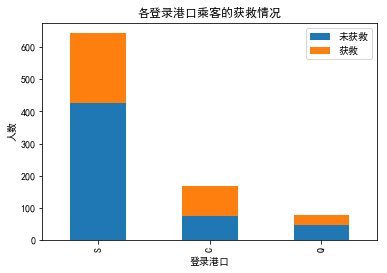

In [13]:
fig = plt.figure()
fig.set(alpha=0.2)
Survived_0 = data_train.Embarked[data_train.Survived==0].value_counts()
Survived_1 = data_train.Embarked[data_train.Survived==1].value_counts()
df = pd.DataFrame({'获救':Survived_1,'未获救':Survived_0})
df.plot(kind='bar',stacked=True)
plt.title("各登录港口乘客的获救情况")
plt.xlabel("登录港口")
plt.ylabel("人数")
plt.show()

## 下面我们来看看 堂兄弟/妹，孩子/父母有几人，对是否获救的影响。

In [14]:
g = data_train.groupby(['SibSp','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
df

PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7

In [15]:
g = data_train.groupby(['Parch','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
df

PassengerId
Parch Survived             
0     0                 445
      1                 233
1     0                  53
      1                  65
2     0                  40
      1                  40
3     0                   2
      1                   3
4     0                   4
5     0                   4
      1                   1
6     0                   1

## 船舱信息

In [16]:
data_train.Cabin.value_counts()

B96 B98            4
G6                 4
C23 C25 C27        4
E101               3
D                  3
F33                3
F2                 3
C22 C26            3
E8                 2
C124               2
C2                 2
B77                2
B49                2
E44                2
B57 B59 B63 B66    2
C123               2
E33                2
D36                2
C78                2
B35                2
B22                2
C92                2
D35                2
D26                2
C126               2
E121               2
D17                2
B18                2
D20                2
C93                2
                  ..
D56                1
A10                1
C47                1
D49                1
E17                1
C95                1
C111               1
C45                1
D11                1
E38                1
A34                1
E40                1
D28                1
F E69              1
A16                1
C50                1
E49          

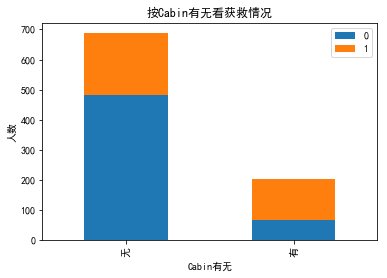

In [17]:
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_cabin = data_train.Survived[pd.notnull(data_train.Cabin)].value_counts()
Survived_nocabin = data_train.Survived[pd.isnull(data_train.Cabin)].value_counts()
df=pd.DataFrame({u'有':Survived_cabin, u'无':Survived_nocabin}).transpose()
df.plot(kind='bar', stacked=True)
plt.title(u"按Cabin有无看获救情况")
plt.xlabel(u"Cabin有无") 
plt.ylabel(u"人数")
plt.show()

# 数据预处理

通常遇到缺值的情况，我们会有几种常见的处理方式

* 如果缺值的样本占总数比例极高，我们可能就直接舍弃了，作为特征加入的话，可能反倒带入noise，影响最后的结果了
* 如果缺值的样本适中，而该属性非连续值特征属性(比如说类目属性)，那就把NaN作为一个新类别，加到类别特征中
* 如果缺值的样本适中，而该属性为连续值特征属性，有时候我们会考虑给定一个step(比如这里的age，我们可以考虑每隔2/3岁为一个步长)，然后把它离散化，之后把NaN作为一个type加到属性类目中。
* 有些情况下，缺失的值个数并不是特别多，那我们也可以试着根据已有的值，拟合一下数据，补充上。

我们这里用scikit-learn中的RandomForest来拟合一下缺失的年龄数据(注：RandomForest是一个用在原始数据中做不同采样，建立多颗DecisionTree，再进行average等等来降低过拟合现象，提高结果的机器学习算法，我们之后会介绍到)

## 用RandomForest拟合缺失的年龄数据

In [18]:
from sklearn.ensemble import RandomForestRegressor
### 使用RandomForestClassifier填补缺失的年龄属性
def set_missing_ages(df):
    
    #把已有的数值型特征取出来丢进RandomForestRegressor中
    age_df = df[['Age','Fare','Parch','SibSp','Pclass']]
    #乘客分为已知年龄和未知年龄两部分
    known_age = age_df[age_df.Age.notnull()].as_matrix()
    unknown_age = age_df[age_df.Age.isnull()].as_matrix()
    
    #y即目标年龄
    y = known_age[:,0]
    #X即特征属性值
    X = known_age[:,1:]
    
    #fit到RandomForestRegressor中
    rfr = RandomForestRegressor(random_state=0,n_estimators=2000,n_jobs=-1)
    rfr.fit(X,y)
    
    #用得到的模型进行未知年龄的结果预测
    predictedAges = rfr.predict(unknown_age[:,1::])
    
    #用得到的预测结果填补原缺失数据
    df.loc[(df.Age.isnull()),'Age'] = predictedAges
    return df,rfr

def set_Cabin_type(df):
    df.loc[(df.Cabin.notnull()),'Cabin'] = "Yes"
    df.loc[(df.Cabin.isnull()),'Cabin'] = "No"
    return df

In [19]:
data_train, rfr = set_missing_ages(data_train)
data_train = set_Cabin_type(data_train)
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,No,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,No,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Yes,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,No,S


## 特征因子化

因为逻辑回归建模时，需要输入的特征都是数值型特征，我们通常会先对类目型的特征因子化。 
什么叫做因子化呢？举个例子：

以Cabin为例，原本一个属性维度，因为其取值可以是[‘yes’,’no’]，而将其平展开为’Cabin_yes’,’Cabin_no’两个属性

* 原本Cabin取值为yes的，在此处的”Cabin_yes”下取值为1，在”Cabin_no”下取值为0
* 原本Cabin取值为no的，在此处的”Cabin_yes”下取值为0，在”Cabin_no”下取值为1

我们使用pandas的”get_dummies”来完成这个工作，并拼接在原来的”data_train”之上，如下所示。


In [20]:
dummies_Cabin = pd.get_dummies(data_train['Cabin'],prefix='Cabin')
dummies_Embarked = pd.get_dummies(data_train['Embarked'],prefix='Embarked')
dummies_Sex = pd.get_dummies(data_train['Sex'],prefix='Sex')
dummies_Pclass = pd.get_dummies(data_train['Pclass'],prefix='Pclass')
df = pd.concat([data_train,dummies_Cabin,dummies_Embarked,dummies_Sex,dummies_Pclass],axis=1)
df.drop(['Pclass','Name','Sex','Ticket','Cabin','Embarked'],axis=1,inplace=True)
df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,22.0,1,0,7.2500,1,0,0,0,1,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,0,1,1,0,0,1,0,1,0,0
2,3,1,26.0,0,0,7.9250,1,0,0,0,1,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,0,1,0,0,1,1,0,1,0,0
4,5,0,35.0,0,0,8.0500,1,0,0,0,1,0,1,0,0,1


## scaling

如果大家了解逻辑回归与梯度下降的话，会知道，各属性值之间scale差距太大，将对收敛速度造成几万点伤害值！甚至不收敛！ (╬▔皿▔)…所以我们先用scikit-learn里面的preprocessing模块对这俩货做一个scaling，所谓scaling，其实就是将一些变化幅度较大的特征化到[-1,1]之内。

In [22]:
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()
age_scale_param = scaler.fit(df['Age'].values.reshape(-1,1))
df['Age_scaled'] = scaler.fit_transform(df['Age'].values.reshape(-1,1), age_scale_param)
fare_scale_param = scaler.fit(df['Fare'].values.reshape(-1,1))
df['Fare_scaled'] = scaler.fit_transform(df['Fare'].values.reshape(-1,1), fare_scale_param)
df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,1,0,22.0,1,0,7.2500,1,0,0,0,1,0,1,0,0,1,-0.561363,-0.502445
1,2,1,38.0,1,0,71.2833,0,1,1,0,0,1,0,1,0,0,0.613182,0.786845
2,3,1,26.0,0,0,7.9250,1,0,0,0,1,1,0,0,0,1,-0.267727,-0.488854
3,4,1,35.0,1,0,53.1000,0,1,0,0,1,1,0,1,0,0,0.392955,0.420730
4,5,0,35.0,0,0,8.0500,1,0,0,0,1,0,1,0,0,1,0.392955,-0.486337


# 逻辑回归建模

我们把需要的feature字段取出来，转成numpy格式，使用scikit-learn中的LogisticRegression建模。

In [23]:
from sklearn import linear_model

#用正则取出我们要的属性值
train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
train_np = train_df.as_matrix()

#y即Survival结果
y = train_np[:,0]
X = train_np[:,1:]

#fit到RandomForestRegressor之中
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
clf.fit(X, y)

clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=1e-06,
          verbose=0, warm_start=False)

# test_data也要预处理

In [25]:
data_test = pd.read_csv("./Titanic/test.csv")
data_test.loc[(data_test.Fare.isnull()),'Fare'] = 0
# 接着我们对test_data做和train_data中一致的特征变换
# 首先用同样的RandomForestRegressor模型填上丢失的年龄
tmp_df = data_test[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
null_age = tmp_df[data_test.Age.isnull()].as_matrix()
# 根据特征属性X预测年龄并补上
X = null_age[:, 1:]
predictedAges = rfr.predict(X)
data_test.loc[ (data_test.Age.isnull()), 'Age' ] = predictedAges

data_test = set_Cabin_type(data_test)
dummies_Cabin = pd.get_dummies(data_test['Cabin'], prefix= 'Cabin')
dummies_Embarked = pd.get_dummies(data_test['Embarked'], prefix= 'Embarked')
dummies_Sex = pd.get_dummies(data_test['Sex'], prefix= 'Sex')
dummies_Pclass = pd.get_dummies(data_test['Pclass'], prefix= 'Pclass')


df_test = pd.concat([data_test, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df_test.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df_test['Age_scaled'] = scaler.fit_transform(df_test['Age'].values.reshape(-1,1), age_scale_param)
df_test['Fare_scaled'] = scaler.fit_transform(df_test['Fare'].values.reshape(-1,1), fare_scale_param)
df_test.head()

,PassengerId,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,892,34.5,0,0,7.8292,1,0,0,1,0,0,1,0,0,1,0.307535,-0.496637
1,893,47.0,1,0,7.0000,1,0,0,0,1,1,0,0,0,1,1.256230,-0.511497
2,894,62.0,0,0,9.6875,1,0,0,1,0,0,1,0,1,0,2.394665,-0.463335
3,895,27.0,0,0,8.6625,1,0,0,0,1,0,1,0,0,1,-0.261683,-0.481704
4,896,22.0,1,1,12.2875,1,0,0,0,1,1,0,0,0,1,-0.641161,-0.416740


In [26]:
test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].as_matrix(), 'Survived':predictions.astype(np.int32)})
result.to_csv("logistic_regression_predictions.csv", index=False)

In [27]:
result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


# 逻辑回归系统优化

我们这个baseline系统还有些粗糙，先再挖掘挖掘。

首先，Name和Ticket两个属性被我们完整舍弃了(好吧，其实是因为这俩属性，几乎每一条记录都是一个完全不同的值，我们并没有找到很直接的处理方式)。

然后，我们想想，年龄的拟合本身也未必是一件非常靠谱的事情，我们依据其余属性，其实并不能很好地拟合预测出未知的年龄。再一个，以我们的日常经验，小盆友和老人可能得到的照顾会多一些，这样看的话，年龄作为一个连续值，给一个固定的系数，应该和年龄是一个正相关或者负相关，似乎体现不出两头受照顾的实际情况，所以，说不定我们把年龄离散化，按区段分作类别属性会更合适一些。

In [32]:
pd.DataFrame({'columns':list(train_df.columns)[1:],"coef":list(clf.coef_.T)})

,coef,columns
0,[-0.344228761167],SibSp
1,[-0.10493146273],Parch
2,[-0.186983503522],Cabin_No
3,[0.715156194887],Cabin_Yes
4,[0.0],Embarked_C
5,[0.0],Embarked_Q
6,[-0.417263193482],Embarked_S
7,[2.14356254623],Sex_female
8,[-0.490433720282],Sex_male
9,[0.341142824071],Pclass_1


首先，大家回去前两篇文章里瞄一眼公式就知道，这些系数为正的特征，和最后结果是一个正相关，反之为负相关。

我们先看看那些权重绝对值非常大的feature，在我们的模型上：

Sex属性，如果是female会极大提高最后获救的概率，而male会很大程度拉低这个概率。
Pclass属性，1等舱乘客最后获救的概率会上升，而乘客等级为3会极大地拉低这个概率。
有Cabin值会很大程度拉升最后获救概率(这里似乎能看到了一点端倪，事实上从最上面的有无Cabin记录的Survived分布图上看出，即使有Cabin记录的乘客也有一部分遇难了，估计这个属性上我们挖掘还不够)
Age是一个负相关，意味着在我们的模型里，年龄越小，越有获救的优先权(还得回原数据看看这个是否合理）
有一个登船港口S会很大程度拉低获救的概率，另外俩港口压根就没啥作用(这个实际上非常奇怪，因为我们从之前的统计图上并没有看到S港口的获救率非常低，所以也许可以考虑把登船港口这个feature去掉试试)。
船票Fare有小幅度的正相关(并不意味着这个feature作用不大，有可能是我们细化的程度还不够，举个例子，说不定我们得对它离散化，再分至各个乘客等级上？)
噢啦，观察完了，我们现在有一些想法了，但是怎么样才知道，哪些优化的方法是promising的呢？

因为test.csv里面并没有Survived这个字段(好吧，这是废话，这明明就是我们要预测的结果)，我们无法在这份数据上评定我们算法在该场景下的效果…

而『每做一次调整就make a submission，然后根据结果来判定这次调整的好坏』其实是行不通的…

# 交叉验证

我们通常情况下，这么做cross validation：把train.csv分成两部分，一部分用于训练我们需要的模型，另外一部分数据上看我们预测算法的效果。

我们用scikit-learn的cross_validation来帮我们完成小数据集上的这个工作。

先简单看看cross validation情况下的打分

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

 #简单看看打分情况
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
all_data = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
X = all_data.as_matrix()[:,1:]
y = all_data.as_matrix()[:,0]
print (cross_val_score(clf, X, y, cv=5))

[ 0.81564246  0.81564246  0.78651685  0.78651685  0.81355932]


既然我们要做交叉验证，那我们干脆先把交叉验证里面的bad case拿出来看看，看看人眼审核，是否能发现什么蛛丝马迹，是我们忽略了哪些信息，使得这些乘客被判定错了。再把bad case上得到的想法和前头系数分析的合在一起，然后逐个试试。

下面我们做数据分割，并且在原始数据集上瞄一眼bad case：

In [37]:
# 分割数据，按照 训练数据:cv数据 = 7:3的比例
split_train, split_cv = train_test_split(df, test_size=0.3, random_state=0)
train_df = split_train.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
# 生成模型
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
clf.fit(train_df.as_matrix()[:,1:], train_df.as_matrix()[:,0])

# 对cross validation数据进行预测

cv_df = split_cv.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(cv_df.as_matrix()[:,1:])

origin_data_train = pd.read_csv("./Titanic/Train.csv")
bad_cases = origin_data_train.loc[origin_data_train['PassengerId'].isin(split_cv[predictions != cv_df.as_matrix()[:,0]]['PassengerId'].values)]
bad_cases.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.0,1,0,349237,17.8000,NaN,S
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S


现在有了”train_df” 和 “vc_df” 两个数据部分，前者用于训练model，后者用于评定和选择模型。可以开始可劲折腾了。

我们随便列一些可能可以做的优化操作： 
* Age属性不使用现在的拟合方式，而是根据名称中的『Mr』『Mrs』『Miss』等的平均值进行填充。 
* Age不做成一个连续值属性，而是使用一个步长进行离散化，变成离散的类目feature。 
* Cabin再细化一些，对于有记录的Cabin属性，我们将其分为前面的字母部分(我猜是位置和船层之类的信息) 和 后面的数字部分(应该是房间号，有意思的事情是，如果你仔细看看原始数据，你会发现，这个值大的情况下，似乎获救的可能性高一些)。 
* Pclass和Sex俩太重要了，我们试着用它们去组出一个组合属性来试试，这也是另外一种程度的细化。 
* 单加一个Child字段，Age<=12的，设为1，其余为0(你去看看数据，确实小盆友优先程度很高啊) 
* 如果名字里面有『Mrs』，而Parch>1的，我们猜测她可能是一个母亲，应该获救的概率也会提高，因此可以多加一个Mother字段，此种情况下设为1，其余情况下设为0 
* 登船港口可以考虑先去掉试试(Q和C本来就没权重，S有点诡异) 
* 把堂兄弟/兄妹 和 Parch 还有自己 个数加在一起组一个Family_size字段(考虑到大家族可能对最后的结果有影响) 
* Name是一个我们一直没有触碰的属性，我们可以做一些简单的处理，比如说男性中带某些字眼的(‘Capt’, ‘Don’, ‘Major’, ‘Sir’)可以统一到一个Title，女性也一样。

我最好的结果是在『Survived~C(Pclass)+C(Title)+C(Sex)+C(Age_bucket)+C(Cabin_num_bucket)Mother+Fare+Family_Size』下取得的